# ============================================================================
# PROBLEM STATEMENT
# ============================================================================
"""
PROBLEM 1: ANOVA TEST
----------------------
Research Question: Does PlayTimeHours differ significantly across GameGenres?

Hypothesis:
- H0 (Null): All game genres have the same mean PlayTimeHours
- H1 (Alternative): At least one genre has different mean PlayTimeHours

Why ANOVA?
- Compare means across 3+ groups (genres)
- Tests if differences are statistically significant
- Helps identify which game types engage players most


PROBLEM 2: CHI-SQUARE TEST
---------------------------
Research Question: Is Gender associated with EngagementLevel?

Hypothesis:
- H0 (Null): Gender and EngagementLevel are independent (no association)
- H1 (Alternative): Gender and EngagementLevel are dependent (associated)

Why Chi-Square?
- Tests relationship between two categorical variables
- Determines if patterns differ from random chance
- Helps understand demographic engagement patterns


Business Impact:
- Target marketing by genre preferences
- Personalize game recommendations
- Optimize player retention strategies
"""

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*80)
print("STATISTICAL HYPOTHESIS TESTING FOR GAMING DATA")
print("ANOVA | Chi-Square Tests")
print("="*80)


STATISTICAL HYPOTHESIS TESTING FOR GAMING DATA
ANOVA | Chi-Square Tests


In [4]:
# ============================================================================
# 1. LOAD AND EXPLORE DATA
# ============================================================================

# Load the dataset
file_path = '../data/processed/gaming_data_processed.csv'
df = pd.read_csv(file_path)

print(f"\n{'='*80}")
print("DATA OVERVIEW")
print(f"{'='*80}")
print(f"\nDataset Shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())



DATA OVERVIEW

Dataset Shape: (40034, 16)

First few rows:
   PlayerID       Age  Gender  Location  GameGenre  PlayTimeHours  \
0      9000  1.096023       1         2          4       0.614176   
1      9001 -0.297969       0         3          4      -0.939816   
2      9002 -0.994965       0         3          3      -0.549654   
3      9003  0.299456       1         3          0      -0.977506   
4      9004  0.100314       1         1          0       0.507275   

   InGamePurchases  GameDifficulty  SessionsPerWeek  \
0                0               2        -0.602363   
1                0               2        -0.775865   
2                0               0         1.132666   
3                1               0        -0.081854   
4                0               2        -1.296374   

   AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                   0.269487     1.026459              0.032814   
1                   1.004019    -1.352160             -1.006

In [5]:

print(f"\n{'='*80}")
print("VARIABLES OF INTEREST")
print(f"{'='*80}")

# Check PlayTimeHours distribution
print(f"\nPlayTimeHours Statistics:")
print(df['PlayTimeHours'].describe())

# Check GameGenre distribution
print(f"\nGameGenre Distribution:")
print(df['GameGenre'].value_counts().sort_index())

# Check Gender distribution
print(f"\nGender Distribution:")
print(df['Gender'].value_counts().sort_index())

# Check EngagementLevel distribution
print(f"\nEngagementLevel Distribution:")
print(df['EngagementLevel'].value_counts().sort_index())


VARIABLES OF INTEREST

PlayTimeHours Statistics:
count    4.003400e+04
mean     2.857506e-17
std      1.000012e+00
min     -1.738978e+00
25%     -8.614969e-01
50%     -2.366490e-03
75%      8.589806e-01
max      1.731888e+00
Name: PlayTimeHours, dtype: float64

GameGenre Distribution:
GameGenre
0    8039
1    7952
2    7983
3    8048
4    8012
Name: count, dtype: int64

Gender Distribution:
Gender
0    16075
1    23959
Name: count, dtype: int64

EngagementLevel Distribution:
EngagementLevel
0    10324
1    19374
2    10336
Name: count, dtype: int64


In [6]:
# ============================================================================
# 2. ANOVA TEST: PlayTimeHours vs GameGenre
# ============================================================================

print(f"\n{'='*80}")
print("ANOVA TEST: PLAYTIMEHOURS vs GAMEGENRE")
print(f"{'='*80}")

print(f"\nResearch Question:")
print("Does PlayTimeHours differ significantly across different GameGenres?")

print(f"\nHypotheses:")
print("H0: μ(genre1) = μ(genre2) = μ(genre3) = ... (all means are equal)")
print("H1: At least one genre mean is different")

# Prepare data for ANOVA
genre_groups = df.groupby('GameGenre')['PlayTimeHours'].apply(list)
genre_names = genre_groups.index.tolist()

# Descriptive statistics by genre
print(f"\n{'='*80}")
print("DESCRIPTIVE STATISTICS BY GENRE")
print(f"{'='*80}")

desc_stats = df.groupby('GameGenre')['PlayTimeHours'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Std', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(4)

print(desc_stats)


ANOVA TEST: PLAYTIMEHOURS vs GAMEGENRE

Research Question:
Does PlayTimeHours differ significantly across different GameGenres?

Hypotheses:
H0: μ(genre1) = μ(genre2) = μ(genre3) = ... (all means are equal)
H1: At least one genre mean is different

DESCRIPTIVE STATISTICS BY GENRE
           Count    Mean     Std     Min     Max
GameGenre                                       
0           8039  0.0203  0.9949 -1.7389  1.7313
1           7952 -0.0024  1.0001 -1.7390  1.7307
2           7983 -0.0183  0.9966 -1.7389  1.7319
3           8048 -0.0081  1.0043 -1.7385  1.7316
4           8012  0.0083  1.0039 -1.7390  1.7308


In [7]:
# Perform ANOVA
f_statistic, p_value = f_oneway(*genre_groups.values)

print(f"\n{'='*80}")
print("ANOVA RESULTS")
print(f"{'='*80}")
print(f"\nF-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Significance level (α): 0.05")

# Interpretation
print(f"\n{'='*80}")
print("INTERPRETATION")
print(f"{'='*80}")

if p_value < 0.05:
    print(f"\n✓ REJECT NULL HYPOTHESIS (p = {p_value:.6f} < 0.05)")
    print("\nConclusion:")
    print("- PlayTimeHours DOES differ significantly across GameGenres")
    print("- The differences are unlikely due to random chance")
    print("- Game genre is a significant factor in play time")
    
    # Find which genre has highest/lowest mean
    mean_by_genre = df.groupby('GameGenre')['PlayTimeHours'].mean().sort_values(ascending=False)
    print(f"\nHighest PlayTime: Genre {mean_by_genre.index[0]} ({mean_by_genre.values[0]:.2f} hours)")
    print(f"Lowest PlayTime: Genre {mean_by_genre.index[-1]} ({mean_by_genre.values[-1]:.2f} hours)")
else:
    print(f"\n✗ FAIL TO REJECT NULL HYPOTHESIS (p = {p_value:.6f} >= 0.05)")
    print("\nConclusion:")
    print("- No significant difference in PlayTimeHours across GameGenres")
    print("- Observed differences could be due to random chance")
    print("- Game genre may not be a strong predictor of play time")



ANOVA RESULTS

F-statistic: 1.7745
P-value: 0.130816
Significance level (α): 0.05

INTERPRETATION

✗ FAIL TO REJECT NULL HYPOTHESIS (p = 0.130816 >= 0.05)

Conclusion:
- No significant difference in PlayTimeHours across GameGenres
- Observed differences could be due to random chance
- Game genre may not be a strong predictor of play time


In [8]:
# Effect size (Eta-squared)
grand_mean = df['PlayTimeHours'].mean()
ss_between = sum(len(group) * (np.mean(group) - grand_mean)**2 for group in genre_groups.values)
ss_total = sum((df['PlayTimeHours'] - grand_mean)**2)
eta_squared = ss_between / ss_total

print(f"\n{'='*80}")
print("EFFECT SIZE")
print(f"{'='*80}")
print(f"\nEta-squared (η²): {eta_squared:.4f}")

if eta_squared < 0.01:
    effect = "Small"
elif eta_squared < 0.06:
    effect = "Medium"
else:
    effect = "Large"
    
print(f"Effect size: {effect}")
print(f"Interpretation: {eta_squared*100:.2f}% of variance in PlayTime explained by Genre")



EFFECT SIZE

Eta-squared (η²): 0.0002
Effect size: Small
Interpretation: 0.02% of variance in PlayTime explained by Genre



✓ ANOVA plots saved as 'anova_analysis.png'


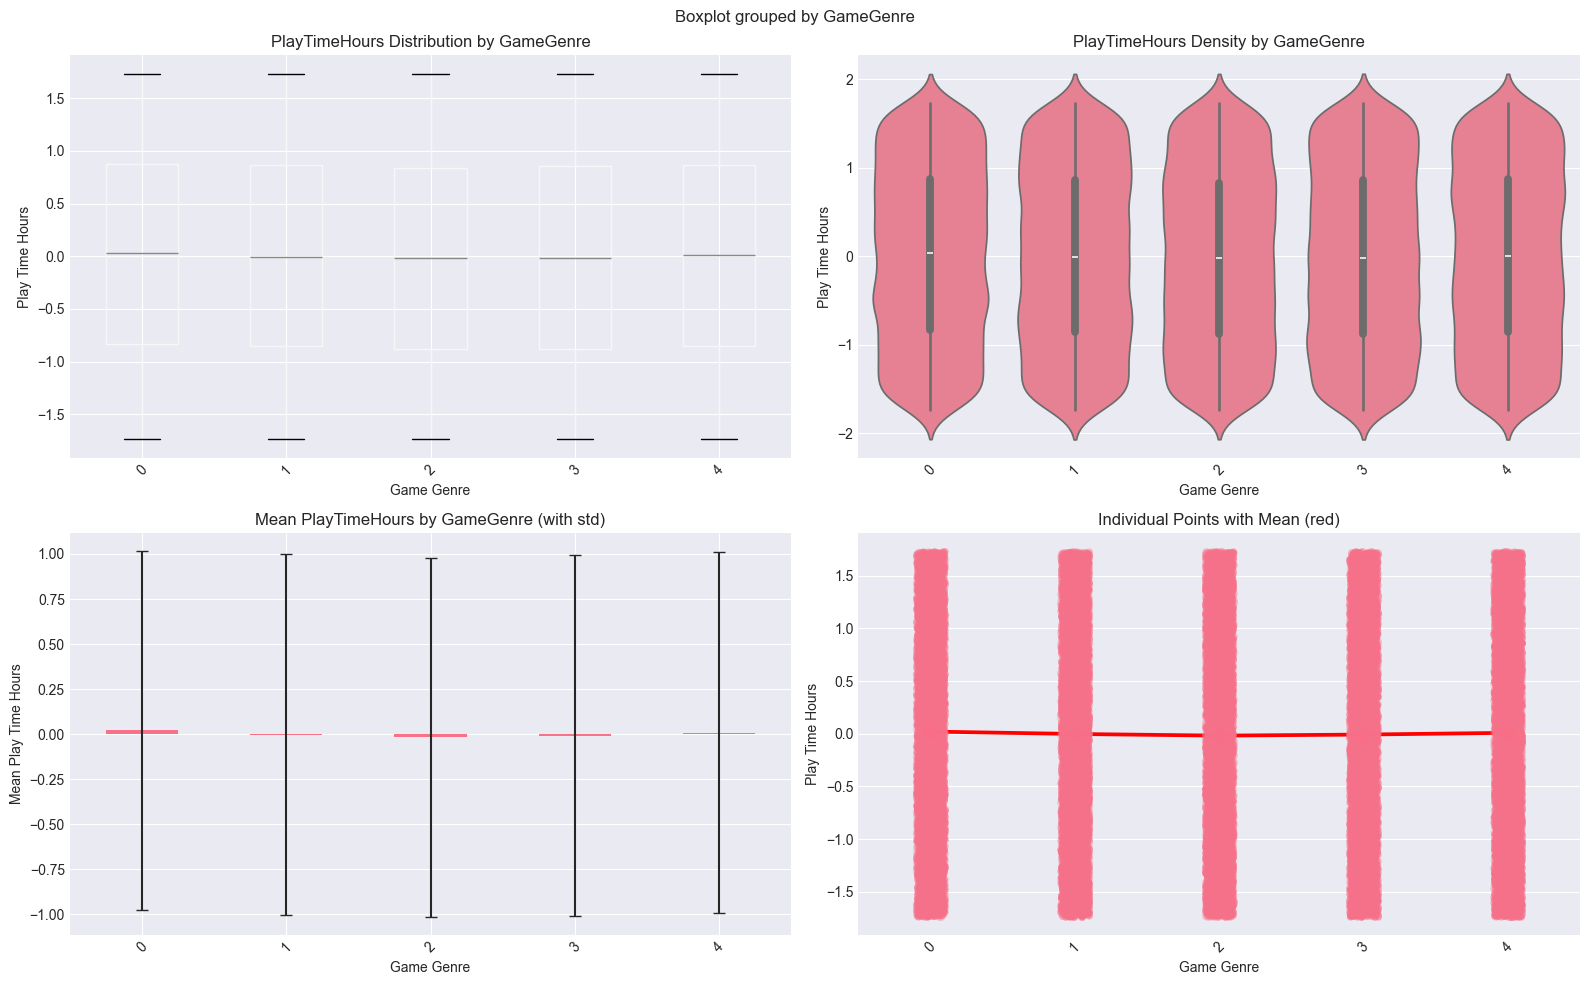

In [9]:
# ============================================================================
# 3. VISUALIZATION: ANOVA
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('ANOVA Analysis: PlayTimeHours vs GameGenre', fontsize=16, fontweight='bold')

# Plot 1: Box plot
ax1 = axes[0, 0]
df.boxplot(column='PlayTimeHours', by='GameGenre', ax=ax1)
ax1.set_title('PlayTimeHours Distribution by GameGenre')
ax1.set_xlabel('Game Genre')
ax1.set_ylabel('Play Time Hours')
plt.sca(ax1)
plt.xticks(rotation=45)

# Plot 2: Violin plot
ax2 = axes[0, 1]
sns.violinplot(data=df, x='GameGenre', y='PlayTimeHours', ax=ax2)
ax2.set_title('PlayTimeHours Density by GameGenre')
ax2.set_xlabel('Game Genre')
ax2.set_ylabel('Play Time Hours')
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Bar plot with error bars
ax3 = axes[1, 0]
mean_std = df.groupby('GameGenre')['PlayTimeHours'].agg(['mean', 'std'])
mean_std.plot(kind='bar', y='mean', yerr='std', ax=ax3, legend=False, capsize=4)
ax3.set_title('Mean PlayTimeHours by GameGenre (with std)')
ax3.set_xlabel('Game Genre')
ax3.set_ylabel('Mean Play Time Hours')
ax3.tick_params(axis='x', rotation=45)

# Plot 4: Strip plot with mean overlay
ax4 = axes[1, 1]
sns.stripplot(data=df, x='GameGenre', y='PlayTimeHours', alpha=0.3, ax=ax4)
sns.pointplot(data=df, x='GameGenre', y='PlayTimeHours', color='red', 
              markers='D', ax=ax4, errorbar=None)
ax4.set_title('Individual Points with Mean (red)')
ax4.set_xlabel('Game Genre')
ax4.set_ylabel('Play Time Hours')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('anova_analysis.png', dpi=300, bbox_inches='tight')
print(f"\n✓ ANOVA plots saved as 'anova_analysis.png'")
plt.show()

In [11]:
# ============================================================================
# 4. CHI-SQUARE TEST: Gender vs EngagementLevel
# ============================================================================

print(f"\n{'='*80}")
print("CHI-SQUARE TEST: GENDER vs ENGAGEMENTLEVEL")
print(f"{'='*80}")

print(f"\nResearch Question:")
print("Is there a significant association between Gender and EngagementLevel?")

print(f"\nHypotheses:")
print("H0: Gender and EngagementLevel are independent (no association)")
print("H1: Gender and EngagementLevel are dependent (associated)")

# Create contingency table
contingency_table = pd.crosstab(df['Gender'], df['EngagementLevel'])

print(f"\n{'='*80}")
print("CONTINGENCY TABLE (OBSERVED FREQUENCIES)")
print(f"{'='*80}")
print(contingency_table)

# Add row and column totals
contingency_with_totals = contingency_table.copy()
contingency_with_totals['Total'] = contingency_with_totals.sum(axis=1)
contingency_with_totals.loc['Total'] = contingency_with_totals.sum()

print(f"\nWith Totals:")
print(contingency_with_totals)

# Perform Chi-Square test
chi2, p_value_chi, dof, expected_freq = chi2_contingency(contingency_table)



CHI-SQUARE TEST: GENDER vs ENGAGEMENTLEVEL

Research Question:
Is there a significant association between Gender and EngagementLevel?

Hypotheses:
H0: Gender and EngagementLevel are independent (no association)
H1: Gender and EngagementLevel are dependent (associated)

CONTINGENCY TABLE (OBSERVED FREQUENCIES)
EngagementLevel     0      1     2
Gender                            
0                4121   7758  4196
1                6203  11616  6140

With Totals:
EngagementLevel      0      1      2  Total
Gender                                     
0                 4121   7758   4196  16075
1                 6203  11616   6140  23959
Total            10324  19374  10336  40034


In [12]:

print(f"\n{'='*80}")
print("EXPECTED FREQUENCIES (under null hypothesis)")
print(f"{'='*80}")
expected_df = pd.DataFrame(
    expected_freq, 
    index=contingency_table.index, 
    columns=contingency_table.columns
)
print(expected_df.round(2))

print(f"\n{'='*80}")
print("CHI-SQUARE TEST RESULTS")
print(f"{'='*80}")
print(f"\nChi-square statistic (χ²): {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value_chi:.6f}")
print(f"Significance level (α): 0.05")



EXPECTED FREQUENCIES (under null hypothesis)
EngagementLevel        0         1        2
Gender                                     
0                4145.43   7779.31  4150.25
1                6178.57  11594.69  6185.75

CHI-SQUARE TEST RESULTS

Chi-square statistic (χ²): 1.1808
Degrees of freedom: 2
P-value: 0.554098
Significance level (α): 0.05


In [13]:

# Interpretation
print(f"\n{'='*80}")
print("INTERPRETATION")
print(f"{'='*80}")

if p_value_chi < 0.05:
    print(f"\n✓ REJECT NULL HYPOTHESIS (p = {p_value_chi:.6f} < 0.05)")
    print("\nConclusion:")
    print("- Gender and EngagementLevel ARE significantly associated")
    print("- The relationship is unlikely due to random chance")
    print("- Gender may influence engagement patterns")
    
    # Calculate percentages
    print(f"\n{'='*80}")
    print("ENGAGEMENT PATTERNS BY GENDER (%)")
    print(f"{'='*80}")
    percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
    print(percentages.round(2))
    
else:
    print(f"\n✗ FAIL TO REJECT NULL HYPOTHESIS (p = {p_value_chi:.6f} >= 0.05)")
    print("\nConclusion:")
    print("- No significant association between Gender and EngagementLevel")
    print("- Observed patterns could be due to random chance")
    print("- Gender may not be a strong predictor of engagement")

# Effect size (Cramér's V)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"\n{'='*80}")
print("EFFECT SIZE")
print(f"{'='*80}")
print(f"\nCramér's V: {cramers_v:.4f}")

if cramers_v < 0.1:
    effect = "Negligible"
elif cramers_v < 0.3:
    effect = "Small"
elif cramers_v < 0.5:
    effect = "Medium"
else:
    effect = "Large"
    
print(f"Effect size: {effect}")
print(f"Interpretation: {effect} association between Gender and EngagementLevel")

# Calculate residuals (to see which cells contribute most)
residuals = (contingency_table - expected_df) / np.sqrt(expected_df)

print(f"\n{'='*80}")
print("STANDARDIZED RESIDUALS")
print(f"{'='*80}")
print("(Values > 2 or < -2 indicate significant deviation from expected)")
print(residuals.round(2))


INTERPRETATION

✗ FAIL TO REJECT NULL HYPOTHESIS (p = 0.554098 >= 0.05)

Conclusion:
- No significant association between Gender and EngagementLevel
- Observed patterns could be due to random chance
- Gender may not be a strong predictor of engagement

EFFECT SIZE

Cramér's V: 0.0054
Effect size: Negligible
Interpretation: Negligible association between Gender and EngagementLevel

STANDARDIZED RESIDUALS
(Values > 2 or < -2 indicate significant deviation from expected)
EngagementLevel     0     1     2
Gender                           
0               -0.38 -0.24  0.71
1                0.31  0.20 -0.58


In [ ]:
# ============================================================================
# 5. VISUALIZATION: CHI-SQUARE
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Chi-Square Analysis: Gender vs EngagementLevel', fontsize=16, fontweight='bold')

# Plot 1: Observed frequencies heatmap
ax1 = axes[0, 0]
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', ax=ax1, cbar_kws={'label': 'Count'})
ax1.set_title('Observed Frequencies')
ax1.set_xlabel('Engagement Level')
ax1.set_ylabel('Gender')

# Plot 2: Expected frequencies heatmap
ax2 = axes[0, 1]
sns.heatmap(expected_df, annot=True, fmt='.1f', cmap='Greens', ax=ax2, cbar_kws={'label': 'Count'})
ax2.set_title('Expected Frequencies (under H0)')
ax2.set_xlabel('Engagement Level')
ax2.set_ylabel('Gender')

# Plot 3: Standardized residuals
ax3 = axes[1, 0]
sns.heatmap(residuals, annot=True, fmt='.2f', cmap='RdBu_r', center=0, ax=ax3, 
            vmin=-3, vmax=3, cbar_kws={'label': 'Std Residual'})
ax3.set_title('Standardized Residuals')
ax3.set_xlabel('Engagement Level')
ax3.set_ylabel('Gender')

# Plot 4: Grouped bar chart
ax4 = axes[1, 1]
contingency_table.plot(kind='bar', ax=ax4, width=0.8)
ax4.set_title('Engagement Distribution by Gender')
ax4.set_xlabel('Gender')
ax4.set_ylabel('Count')
ax4.legend(title='Engagement Level', bbox_to_anchor=(1.05, 1))
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('chi_square_analysis.png', dpi=300, bbox_inches='tight')
print(f"\n✓ Chi-Square plots saved as 'chi_square_analysis.png'")
plt.show()